# CRIMINAL OR NOT

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

## Loading the datasets

In [2]:
train_data = pd.read_csv('criminal_train.csv')
test_data = pd.read_csv('criminal_test.csv')

In [3]:
train_data.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [4]:
test_data.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


In [5]:
train_data.shape

(45718, 72)

In [6]:
test_data.shape

(11430, 71)

## Checking for NULL values

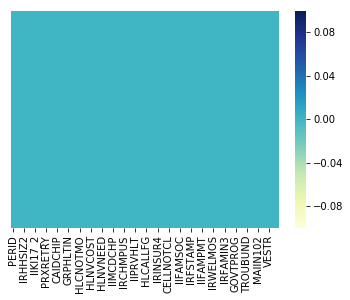

In [7]:
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = True, cmap = "YlGnBu")
plt.show()

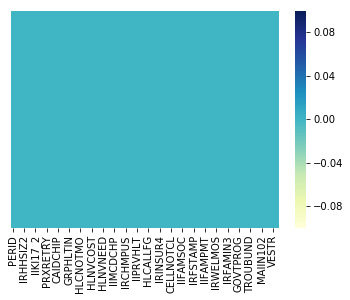

In [8]:
sns.heatmap(test_data.isnull(), yticklabels = False, cbar = True, cmap = "YlGnBu")
plt.show()

#### We can celarly see there is no null values as train_data.isnull() returns zero that is mapped with blue and there is no other color for both train and test datasets 

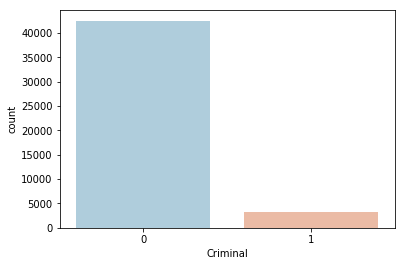

In [9]:
sns.countplot(x = 'Criminal', data = train_data, palette = 'RdBu_r')
plt.show()

#### Checking the ratio of criminal and people who are not criminal

## Removing duplicate columns if any

In [10]:
train_enc = pd.DataFrame(index = train_data.index)
for col in tqdm_notebook(train_data.columns):
    train_enc[col] = train_data[col].factorize()[0]
duplicates = {}
for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i+1 :]:
        if c2 not in duplicates and np.all(train_enc[c1] == train_enc[c2]):
            duplicates[c2] = c1
duplicates

A Jupyter Widget

A Jupyter Widget

{'HLCALL99': 'HLCALLFG'}

#### We can see that HLCALL99 and HLCALLFG are duplicate columns i.e they have same value for every row, so we need to drop one of these columns

In [11]:
train_data.drop("HLCALL99", axis = 1, inplace = True)
test_data.drop("HLCALL99", axis = 1, inplace = True)

In [12]:
train_data.shape

(45718, 71)

In [13]:
test_data.shape

(11430, 70)

#### Now the data is not redundant but we need to drop the 'PERID' column as it bears no relevant information for our model 

In [14]:
temp = test_data["PERID"]
train_data.drop("PERID", axis = 1, inplace = True)
test_data.drop("PERID", axis = 1, inplace = True)

In [15]:
X_train = train_data.iloc[:, :69]
y_train = train_data.iloc[:, 69]

## Splitting the train_data into train-test set

In [16]:
X_train_ , X_test_, y_train_, y_test_ = train_test_split(X_train, y_train, test_size = 0.5)

## Making classifiers
### 1) Random Forest

In [17]:
classifierRF = RandomForestClassifier(n_estimators = 150)

### 2) XGBoost

In [18]:
classifierXGB = XGBClassifier(n_estimaotrs = 150)

## Training classifiers

In [19]:
classifierRF.fit(X_train_, y_train_)
classifierXGB.fit(X_train_, y_train_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimaotrs=150,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

## Predicting on test splitted data

In [20]:
y_predRF = classifierRF.predict(X_test_)
y_predXGB = classifierXGB.predict(X_test_)

/home/atul/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Predicting on the original test_data

In [21]:
y_predRF_f = classifierRF.predict(test_data)
y_predXGB_f = classifierXGB.predict(test_data)

/home/atul/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Storing the predictions on test_data and the splitted test data in stacks

In [22]:
prediction_stack_stest = np.column_stack((y_predRF, y_predXGB))
prediction_stack_test = np.column_stack((y_predRF_f, y_predXGB_f))

## Creating a final Random Forest classifier

In [23]:
classifierRF_final = RandomForestClassifier(n_estimators = 150)

## Fitting the model on the predicted values stack prediction_stack_stest

In [24]:
classifierRF_final.fit(prediction_stack_stest, y_test_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predicting the final value

In [25]:
y_pred_fin = classifierRF_final.predict(prediction_stack_test)

## Checking the score

In [26]:
classifierRF_final.score(prediction_stack_stest, y_test_)

0.9535412747714248

## Storing the final prediction values for submission

In [27]:
submission_csv = pd.DataFrame({    
    "PERID": temp,
    "Criminal": y_pred_fin
    })
submission_csv.to_csv('out.csv', index = False, columns = ['PERID', 'Criminal'])